In [1]:
from IPython.display import Image

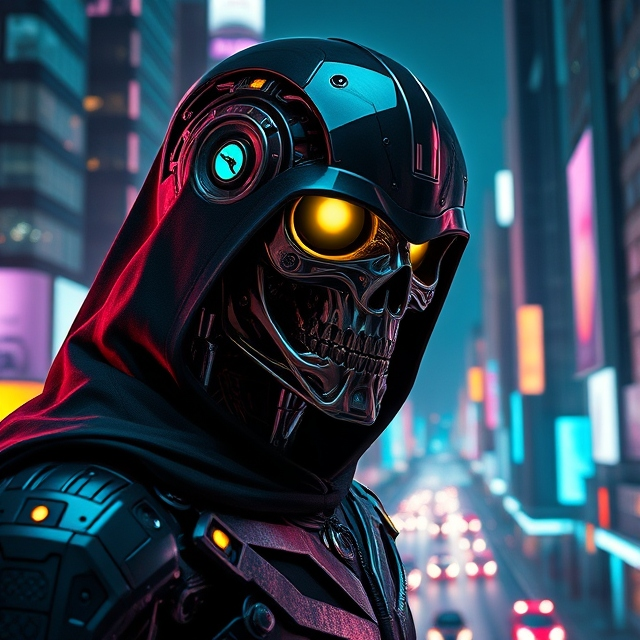

In [2]:
Image(filename = 'Simple-Agent.jpeg')

# Simple Agent

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

Source: [LlamaIndex](https://docs.llamaindex.ai/en/stable/understanding/agent)

License: [Apache-2.0](https://github.com/mytechnotalent/Simple-Agent/blob/main/LICENSE)

## Building a Basic Agent

In LlamaIndex, an agent is a semi-autonomous piece of software powered by an LLM that is given a task and executes a series of steps towards solving that task. It is given a set of tools, which can be anything from arbitrary functions up to full LlamaIndex query engines, and it selects the best available tool to complete each step. When each step is completed, the agent judges whether the task is now complete, in which case it returns a result to the user, or whether it needs to take another step, in which case it loops back to the start.

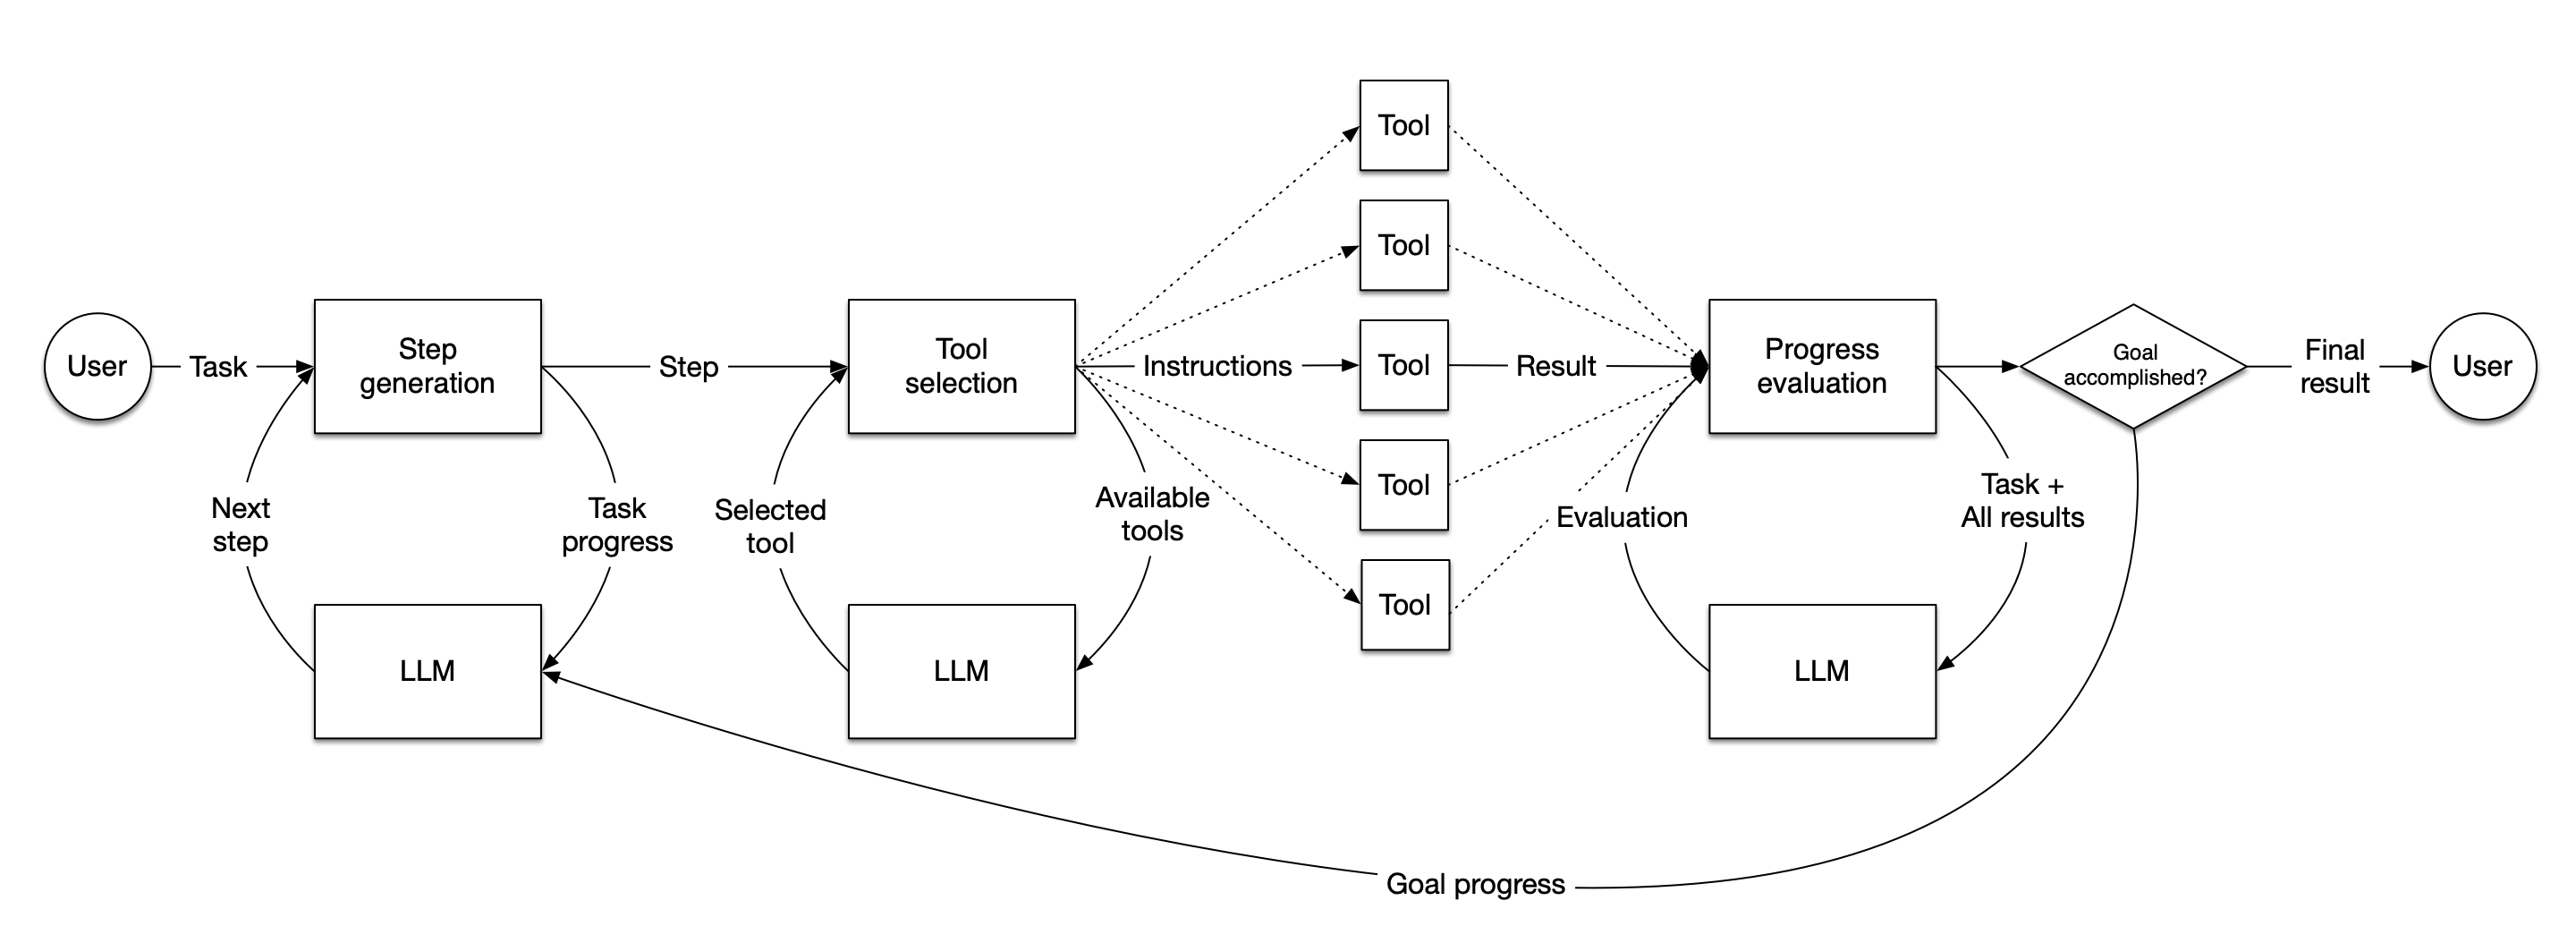

In [3]:
Image(filename = 'agent_flow.png')

## Create Basic Tools

For this simple example we'll be creating two tools: one that calculates the factorial of a number and the other to check if a number is prime.

```python
def factorial(n: int) -> int:
    """Calculate the factorial of a number."""
    if n == 0:
        return 1
    return n * factorial(n - 1)


def is_prime(n: int) -> bool:
    """Check if a number is prime."""
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True
```

As you can see, these are regular vanilla Python functions. The docstring comments provide metadata to the agent about what the tool does: if your LLM is having trouble figuring out which tool to use, these docstrings are what you should tweak first.

After each function is defined we create `FunctionTool` objects from these functions, which wrap them in a way that the agent can understand.

```python
factorial_tool = FunctionTool.from_defaults(fn=factorial)
is_prime_tool = FunctionTool.from_defaults(fn=is_prime)
```

## Initialize the LLM

We will use the `mixtral:8x7b` open-source model with Ollama.

```python
llm = Ollama(model="mixtral:8x7b", request_timeout=300.0)
```

## Initialize the Agent

Now we create our agent. In this case, this is a `ReAct` agent, a relatively simple but powerful agent. We give it an array containing our two tools, the LLM we just created, and set `verbose=True` so we can see what's going on.

```python
agent = ReActAgent.from_tools(
    [
        factorial_tool, 
        is_prime_tool
    ], 
    llm=llm, 
    verbose=True, 
    max_iterations=10  # increase from the default (usually 3-5)
)
```

## Ask a Question

We specify that it should use a tool, as this is pretty simple and `mixtral:8x7b` doesn't really need this tool to get the answer.

```python
response = agent.chat("What is the factorial of 5? Calculate step by step detailing all of your thought process.")
```

```python
response = agent.chat("Is 29 a prime number? Calculate step by step detailing all of your thought process.")
```

## Install Libraries

In [4]:
!pip install llama-index-core llama-index-readers-file llama-index-llms-ollama llama-index-embeddings-huggingface

Install & Run Ollama

In [5]:
import os
import platform
import subprocess


def install_and_manage_ollama():
    """Install and manage Ollama on various OS platforms."""

    # detect system
    system = platform.system()

    try:
        # check if Ollama is installed
        if system == "Darwin":
            print("Detected macOS. Checking if Ollama is installed...")
            if subprocess.run(['which', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE).returncode != 0:
                print("Installing Ollama on macOS using Homebrew...")
                os.system("brew install ollama")
            else:
                print("Ollama is already installed.")
        elif system == "Linux":
            print("Detected Linux. Checking if Ollama is installed...")
            if subprocess.run(['which', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE).returncode != 0:
                print("Installing Ollama on Linux...")
                os.system("curl -sSL https://ollama.com/install | sh")
            else:
                print("Ollama is already installed.")
        elif system == "Windows":
            print("Detected Windows.")
            print("Please download and install Ollama manually from https://ollama.com.")
            return
        else:
            print("Unsupported operating system. Exiting.")
            return

        # start a new Ollama process if Mac or Linux
        print("Managing Ollama process...")
        if system in ["Darwin", "Linux"]:
            print("Starting ollama serve in the background...")
            subprocess.Popen(['ollama', 'serve'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, preexec_fn=os.setpgrp)
            print("ollama serve is now running in the background.")
        else:
            print("Automatic management of Ollama is not supported on Windows. Please run Ollama manually.")
    except Exception as e:
        print(f"An error occurred: {e}")
        return


# run the function
install_and_manage_ollama()

Detected macOS. Checking if Ollama is installed...
Ollama is already installed.
Managing Ollama process...
Starting ollama serve in the background...
ollama serve is now running in the background.


## Obtain `mixtral:8x7b` Model

In [6]:
import platform
import subprocess


def run_ollama_mixtral():
    """Obtain mixtral:8x7b model from Ollama."""

    # detect system
    system = platform.system()

    # detect and obtain mixtral:8x7b model on respective OS platform
    try:
        if system in ["Darwin", "Linux"]:  
            print(f"Detected {system}. Running ollama mixtral:8x7b...")
            if subprocess.run(['which', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE).returncode != 0:
                print("Ollama is not installed. Please install it and try again.")
                return
            result = subprocess.run(['ollama', 'run', 'mixtral:8x7b'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            if result.returncode == 0:
                print("Command executed successfully.")
            else:
                print("Failed to execute the command:")
                print(result.stderr)
        elif system == "Windows":
            print("Detected Windows.")
            print("Please run the following command manually in your terminal:")
            print("`ollama run mixtral:8x7b`")
            return
        else:
            print("Unsupported operating system. Exiting.")
            return
    except Exception as e:
        print(f"An error occurred: {e}")
        return


# run the function
run_ollama_mixtral()

Detected Darwin. Running ollama mixtral:8x7b...
Command executed successfully.


## Instantiate LLM, Register Tools w/ `ReactAgent`, Instantiate `agent` Object

In [7]:
from llama_index.core.agent import ReActAgent
from llama_index.llms.ollama import Ollama
from llama_index.core.tools import FunctionTool


def factorial(n: int) -> int:
    """Calculate the factorial of a number."""

    if n == 0:
        return 1
    return n * factorial(n - 1)


def is_prime(n: int) -> bool:
    """Check if a number is prime."""

    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True


factorial_tool = FunctionTool.from_defaults(fn=factorial)
is_prime_tool = FunctionTool.from_defaults(fn=is_prime)

llm = Ollama(model="mixtral:8x7b", request_timeout=300.0)

agent = ReActAgent.from_tools(
    [
        factorial_tool, 
        is_prime_tool
    ], 
    llm=llm, 
    verbose=True, 
    max_iterations=10  # increase from the default (usually 3-5)
)

## Chat w/ Agent

In [8]:
response = agent.chat("What is the factorial of 5? Calculate step by step detailing all of your thought process and make sure you use the tools provided.")
print(response)

> Running step f8eb04c0-509d-4379-941f-73d7098d5e39. Step input: What is the factorial of 5? Calculate step by step detailing all of your thought process and make sure you use the tools provided.
Thought: The current language of the user is: English. I need to calculate the factorial of 5. I will use the 'factorial' tool for this task.
Action: factorial
Action Input: {'n': 5}
Observation: 120
> Running step 3196981b-f82e-45a6-b322-291c57d27fed. Step input: None
Thought: I can answer without using any more tools. I'll use the user's language to answer.
Answer: The factorial of 5 is 120.
The factorial of 5 is 120.


In [9]:
response = agent.chat("Is 29 a prime number? Calculate step by step detailing all of your thought process and make sure you use the tools provided.")
print(response)

> Running step 89761c13-da81-4b66-a936-c413849042db. Step input: Is 29 a prime number? Calculate step by step detailing all of your thought process and make sure you use the tools provided.
Thought: The current language of the user is English. I need to determine if the number 29 is a prime number using the 'is_prime' tool.
Action: is_prime
Action Input: {'n': 29}
Observation: True
> Running step 4fde8c83-4a3e-42a2-8bc0-79b261aef4b3. Step input: None
Thought: I can answer without using any more tools. The observation from the 'is_prime' tool confirmed that the number 29 is a prime number, so there's no need to use any further tools or perform additional calculations.
Answer: Yes, 29 is a prime number.
Yes, 29 is a prime number.


## Terminate Ollama Instances

In [10]:
import os
import platform
import subprocess
import time


def kill_existing_ollama():
    """Kill all existing Ollama processes on macOS or Linux."""

    # detect system
    system = platform.system()

    # handle Windows OS
    if system not in ["Darwin", "Linux"]:
        print("This script is designed to run on macOS or Linux. Skipping process termination.")
        return

    # terminate all Ollama instances
    result = subprocess.run(['pgrep', '-f', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.stdout:
        pids = result.stdout.strip().splitlines()  # get all PIDs
        print(f"Found running Ollama processes with PIDs: {', '.join(pids)}. Killing them...")
        for pid in pids:
            try:
                os.kill(int(pid), 9)  # kill each PID individually
                print(f"Killed process with PID: {pid}")
            except Exception as e:
                print(f"Failed to kill process with PID: {pid}. Error: {e}")
        print("Waiting for processes to terminate...")
        time.sleep(10)  # allow time for processes to shut down
    else:
        print("No Ollama process found running.")


# run the function
kill_existing_ollama()

Found running Ollama processes with PIDs: 89335, 89342. Killing them...
Killed process with PID: 89335
Killed process with PID: 89342
Waiting for processes to terminate...
